# 总览
这一章的内容主要为围绕Pytorch生态进行展开介绍。
重点介绍
 - torchvision，解决图像问题
 - Pytorchvidel，解决视频问题
 - torchtext，解决文本问题

## 与transforms函数库的类似的Matplotlib
Matplotlib是一个特别像MATLAB的python库函数

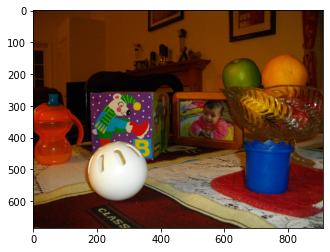

In [41]:
from PIL import Image 
im=Image.open('toysflash.png') 
imshow(im)

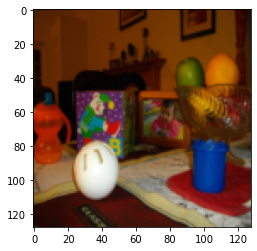

In [37]:
new_img = img.resize((128,128),Image.BILINEAR) 
new_img.save("new_img.jpg") 
imshow(new_img)

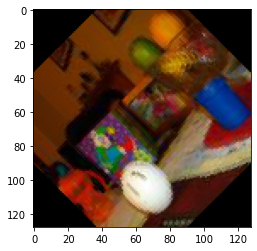

In [36]:
rot_img = new_img.rotate(45) 
figure()
imshow(rot_img)
show()

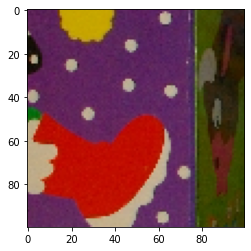

In [47]:
box = (300,300,400,400)
region = im.crop(box)
figure()
imshow(region)

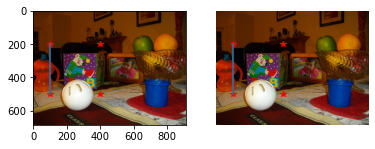

In [2]:
from PIL import Image
from pylab import *

# 读取图像到数组中
im = array(Image.open('toysflash.png'))
figure()

# 绘制有坐标轴的
subplot(121) #1行2列第1组图
imshow(im) #显示图像函数
x = [100, 100, 400, 400]
y = [200, 500, 200, 500]

# 使用红色星状标记绘制点
plot(x, y, 'r*')


# 绘制连接两个点的线（默认为蓝色）
plot(x[:2], y[:2])


# 不显示坐标轴的
subplot(122) #1行2列第2张图
imshow(im)
x = [100, 100, 400, 400]
y = [200, 500, 200, 500]

plot(x, y, 'r*')
plot(x[:2], y[:2])
axis('off') #不显示坐标轴

show()


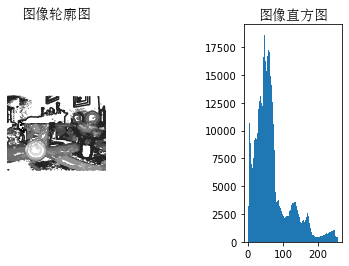

In [21]:
#coding=utf-8
from PIL import Image
from pylab import *

# 添加中文字体支持，MATLAB也同样有需要加载中文字体的需求
from matplotlib.font_manager import FontProperties

font = FontProperties(fname=r"c:\windows\fonts\SimSun.ttc", size=14) #加载中文字体
# 打开图像，并转成灰度图像
im = array(Image.open('toysflash.png').convert('L')) 
#PIL中，有九种不同模式: 1（二值图像），L（灰度图像），P（8位彩色图像），RGB，RGBA，CMYK，YCbCr，I，F,
#请参考：https://blog.csdn.net/icamera0/article/details/50843172/

# 新建一个图像
figure()
subplot(131)
# 不使用颜色信息
gray()
# 在原点的左上角显示轮廓图像
contour(im, origin='image')
axis('equal')#表示x轴和y轴的单位长度相同
axis('off')
title(u'图像轮廓图', fontproperties=font)

subplot(133)
# 利用hist来绘制直方图
# 第一个参数为一个一维数组
# 因为hist只接受一维数组作为输入，所以要用flatten()方法将任意数组按照行优先准则转化成一个一维数组
# 第二个参数指定bin的个数
hist(im.flatten(), 128) #flatten将矩阵化为1维，这里可以显示直方图
title(u'图像直方图', fontproperties=font)
# plt.xlim([0,250]) #坐标取值限制在[0,250]
# plt.ylim([0,12000])

show()

In [9]:
def histeq(im,nbr_bins=256):
#对一幅灰度图像进行直方图均衡化

# 计算图像的直方图
    imhist,bins = histogram(im.flatten(),nbr_bins,normed=True)
    cdf = imhist.cumsum()      # 累积分布函数
    cdf = 255 * cdf / cdf[-1]  # 归一化
# 此处使用到累积分布函数cdf的最后一个元素（下标为-1），其目的是将其归一化到0~1范围

# 使用累积分布函数的线性插值，计算新的像素值
    im2 = interp(im.flatten(),bins[:-1],cdf)

    return im2.reshape(im.shape), cdf

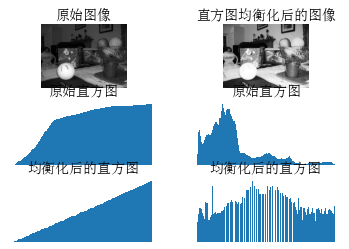

In [24]:
from PIL import Image
from pylab import *
from PCV.tools import imtools

# 添加中文字体支持
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\SimSun.ttc", size=14)

im = array(Image.open('toysflash.png').convert('L'))
# 打开图像，并转成灰度图像
#im = array(Image.open('../data/AquaTermi_lowcontrast.JPG').convert('L'))
im2, cdf = imtools.histeq(im)

figure()
subplot(3, 2, 1)
axis('off')
gray()
title(u'原始图像', fontproperties=font)
imshow(im)

subplot(3, 2, 2)
axis('off')
title(u'直方图均衡化后的图像', fontproperties=font)
imshow(im2)

subplot(3, 2, 3)
axis('off')
title(u'原始直方图', fontproperties=font)
hist(im.flatten(), 128, cumulative=True, density=True, stacked=True) #累积函数直方图

subplot(3, 2, 4)
axis('off')
title(u'原始直方图', fontproperties=font)
hist(im.flatten(), 128, density=True, stacked=True) #分布函数直方图

subplot(3, 2, 5)
axis('off')
title(u'均衡化后的直方图', fontproperties=font)
hist(im2.flatten(), 128, cumulative=True, density=True, stacked=True)


subplot(3, 2, 6)
axis('off')
title(u'均衡化后的直方图', fontproperties=font)
hist(im2.flatten(), 128, density=True, stacked=True)

show()
